**MEDXNET Model: A Deep Learning Model for Automated Chest X-ray Diagnosis**
by: Anarghya Jain




In [ ]:
from google.colab import drive
import os
from glob import glob

drive.mount('/content/drive')

DATASET_PATH = '/content/drive/My Drive/MedXNet_Project/chest_xray'

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate
import os

In [ ]:
dataset_path = "/content/drive/My Drive/MedXNet_Project/chest_xray/train"

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_gen.flow_from_directory(
    dataset_path, target_size=(224, 224),
    batch_size=32, class_mode='sparse', subset='training'
)

val_generator = data_gen.flow_from_directory(
    dataset_path, target_size=(224, 224),
    batch_size=32, class_mode='sparse', subset='validation'
)

print("Class Indices:", train_generator.class_indices)


Found 8129 images belonging to 4 classes.
Found 2029 images belonging to 4 classes.
Class Indices: {'BACTERIAL_PNEUMONIA': 0, 'NORMAL': 1, 'TB': 2, 'VIRAL_PNEUMONIA': 3}


In [ ]:
input_shape = (224, 224, 3)
input_1 = Input(shape=input_shape, name="input_1")
input_2 = Input(shape=input_shape, name="input_2")

# Load Pretrained Models (Without Top Layers)
resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=input_1)
vgg = VGG19(weights='imagenet', include_top=False, input_tensor=input_2)

# Extract Features
resnet_output = Flatten()(resnet.output)
vgg_output = Flatten()(vgg.output)

# Concatenate Features
combined_features = Concatenate()([resnet_output, vgg_output])

# Fully Connected Layers
x = Dense(512, activation='relu')(combined_features)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='softmax')(x)  # 4 Classes: TB, Normal, Bacterial, Viral


medxnet = Model(inputs=[input_1, input_2], outputs=output_layer)


medxnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


medxnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 107,970,244 (411.87 MB)

 Trainable params: 107,917,124 (411.67 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
import tensorflow as tf

def dual_input_generator(directory_iterator):
    for images, labels in directory_iterator:
        yield (images, images), labels

train_dual_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(train_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)  # Labels
    )
)

val_dual_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(val_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)  # Labels
    )
)

In [ ]:
def dual_input_generator(directory_iterator):
    for images, labels in directory_iterator:
        if images.ndim == 3:
            images = tf.expand_dims(images, axis=0)
            labels = tf.expand_dims(labels, axis=0)
        yield (images, images), labels

In [ ]:
train_steps_per_epoch = len(train_generator)
val_steps_per_epoch = len(val_generator)

print(f"Train Steps per Epoch: {train_steps_per_epoch}")
print(f"Validation Steps per Epoch: {val_steps_per_epoch}")


Train Steps per Epoch: 255
Validation Steps per Epoch: 64


In [ ]:
history = medxnet.fit(
    train_dual_dataset,
    validation_data=val_dual_dataset,
    epochs=30,
    steps_per_epoch=train_steps_per_epoch,
    validation_steps=val_steps_per_epoch
)


Epoch 1/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.8917 - loss: 0.3012 - val_accuracy: 0.4482 - val_loss: 1.7554
Epoch 2/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9248 - loss: 0.2017 - val_accuracy: 0.6277 - val_loss: 1.0476
Epoch 3/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.9496 - loss: 0.1204 - val_accuracy: 0.7993 - val_loss: 0.6279
Epoch 4/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9753 - loss: 0.0743 - val_accuracy: 0.8713 - val_loss: 0.4477
Epoch 5/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9870 - loss: 0.0326 - val_accuracy: 0.8723 - val_loss: 0.3931
Epoch 6/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9896 - loss: 0.0295 - val_accuracy: 0.8817 - val_loss: 0.5108
Epoch 7/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9921 - loss: 0.0216 - val_accuracy: 0.8762 - val_loss: 0.5670
Epoch 8/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.9899 - loss: 0.0311 - val_accu

In [ ]:
medxnet.save("/content/drive/My Drive/MedXNet_Project/medxnet_model.h5")


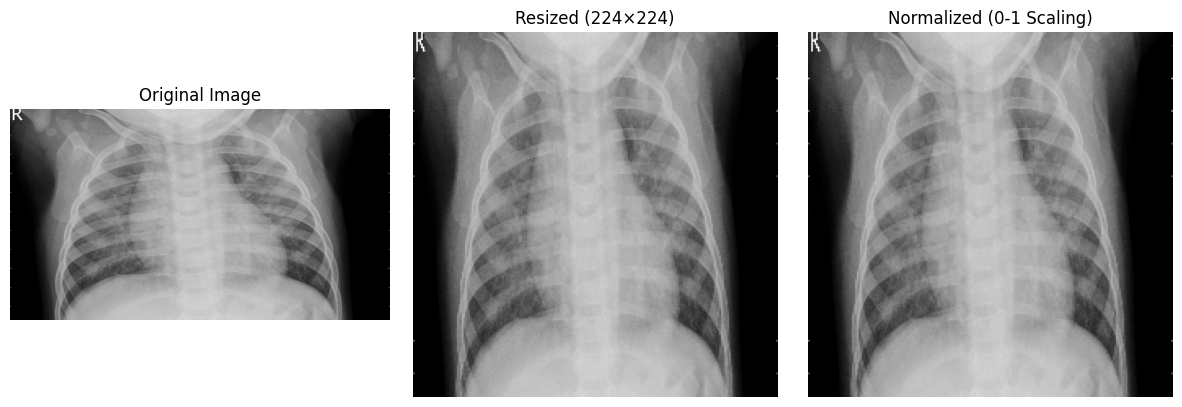

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/drive/My Drive/MedXNet_Project/chest_xray/train/VIRAL_PNEUMONIA/VIRUS-3699163-0001.jpeg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(original_image, (224, 224))

normalized_image = resized_image / 255.0

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(original_image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(resized_image)
ax[1].set_title("Resized (224×224)")
ax[1].axis("off")

ax[2].imshow(normalized_image)
ax[2].set_title("Normalized (0-1 Scaling)")
ax[2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
!ls "/content/drive/My Drive/MedXNet_Project"


chest_xray  medxnet_model.h5


In [ ]:
TEST_PATH = "/content/drive/My Drive/MedXNet_Project/chest_xray/test"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 861 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
import numpy as np

def dual_input_test_generator(directory_iterator):
    for images, labels in directory_iterator:
        yield (images, images), labels

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_dual_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_test_generator(test_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None, 4), dtype=tf.float32)
    )
)
steps_per_epoch = len(test_generator)

model = tf.keras.models.load_model("/content/drive/My Drive/MedXNet_Project/medxnet_model.h5")

y_pred_probs = model.predict(test_dual_dataset, steps=steps_per_epoch)

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes  # Directly use class indices

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='weighted'))
print("Recall:", recall_score(y_true, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))


Found 861 images belonging to 4 classes.
27/27 ━━━━━━━━━━━━━━━━━━━━━ 20s 596ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       242
           1       0.91      0.90      0.90       234
           2       0.89      0.97      0.93       237
           3       0.90      0.82      0.86       148

    accuracy                           0.91       861
   macro avg       0.91      0.90      0.90       861
weighted avg       0.91      0.91      0.91       861

Confusion Matrix:
 [[220  12   5   5]
 [ 10 210   8   6]
 [  2   3 230   2]
 [  5   6  15 122]]
Accuracy: 0.908246225319396
Precision: 0.9075864978902954
Recall: 0.908246225319396
F1 Score: 0.9078412224654321


Found 8129 images belonging to 4 classes.
Visualizing predictions on training samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


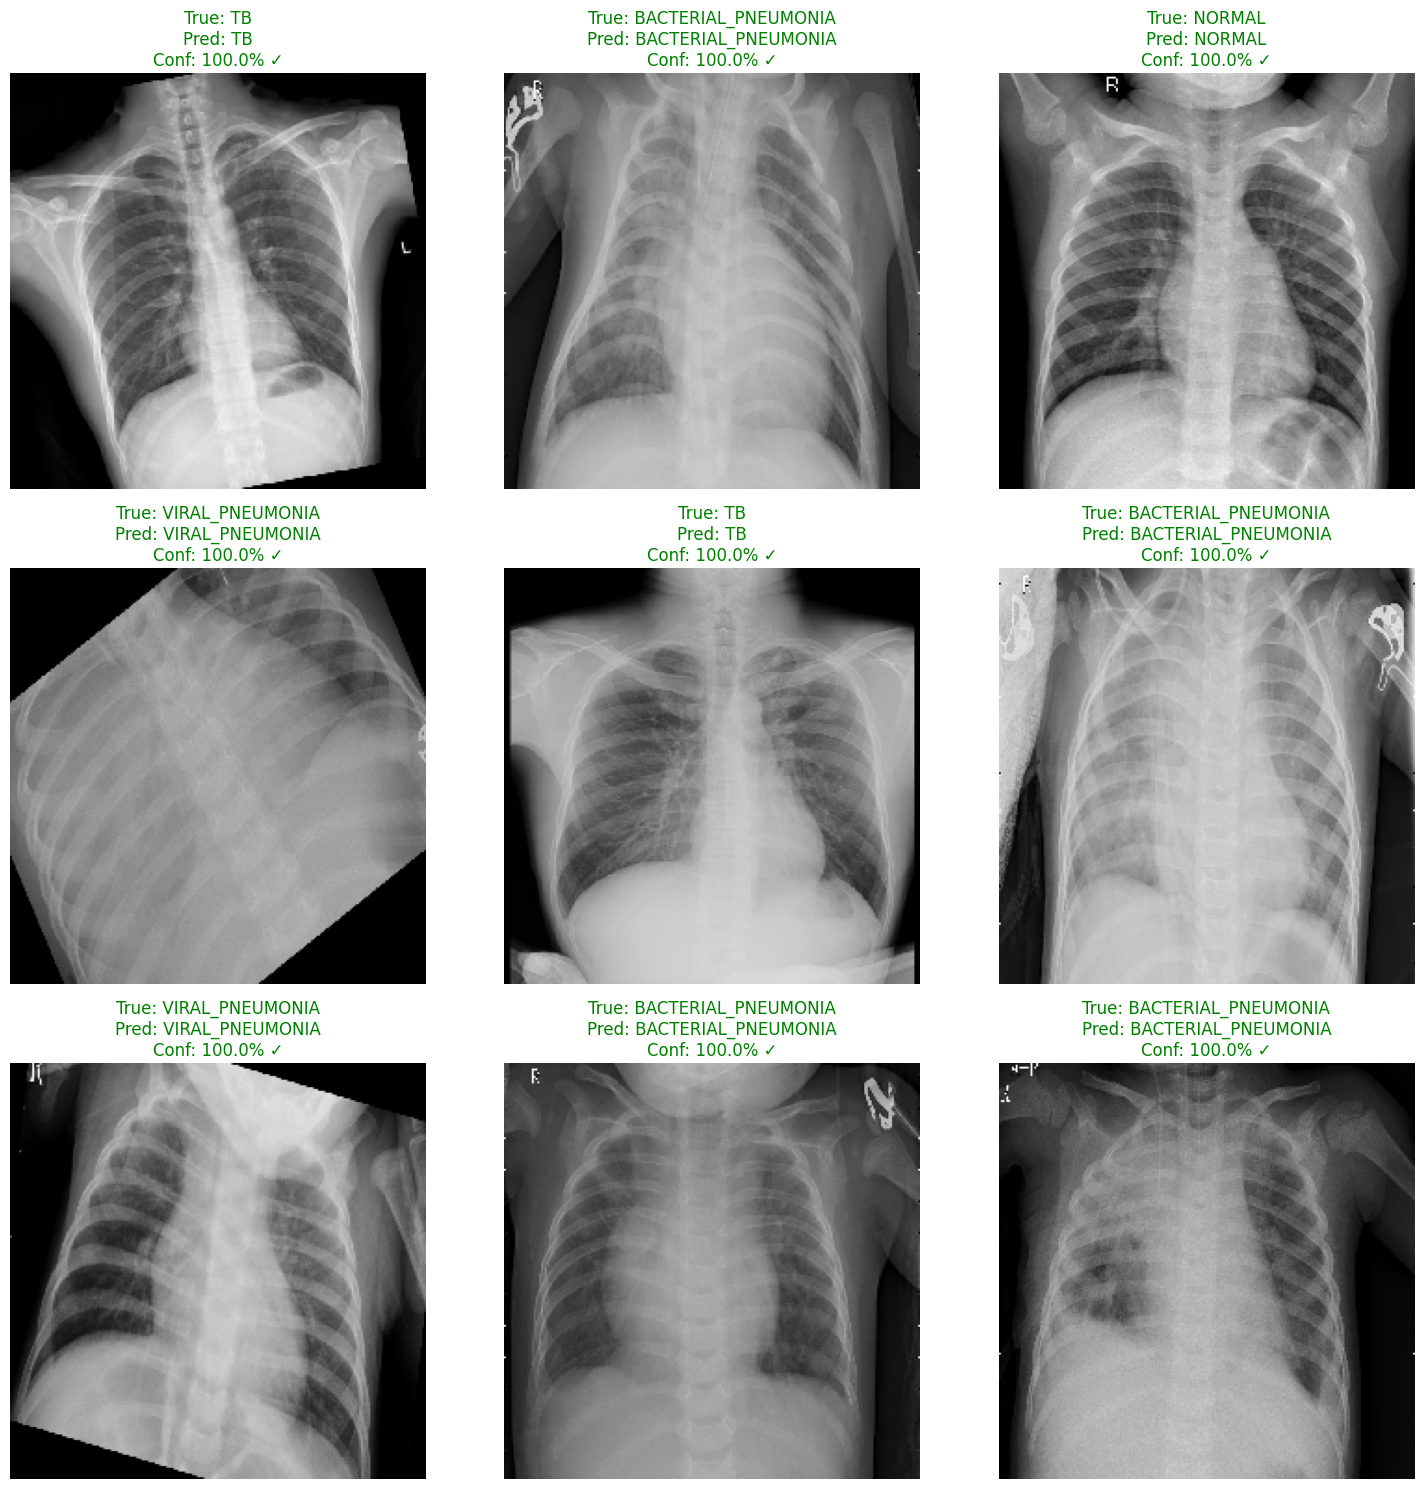

In [ ]:
MODEL_PATH = "/content/drive/My Drive/MedXNet_Project/medxnet_model.h5"
TRAIN_PATH = "/content/drive/My Drive/MedXNet_Project/chest_xray/train"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

CLASS_NAMES = {
    0: 'BACTERIAL_PNEUMONIA', 1: 'NORMAL', 2: 'TB', 3: 'VIRAL_PNEUMONIA'
}

model = tf.keras.models.load_model(MODEL_PATH)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

def visualize_predictions(num_samples=9):

    images, true_labels = next(train_generator)

    dual_input = (images, images)

    pred_probs = model.predict(dual_input)
    pred_labels = np.argmax(pred_probs, axis=1)
    confidences = np.max(pred_probs, axis=1) * 100

    grid_size = int(np.sqrt(num_samples))
    plt.figure(figsize=(15, 15))

    for i in range(num_samples):
        ax = plt.subplot(grid_size, grid_size, i+1)

        plt.imshow(images[i])

        true_class = CLASS_NAMES[true_labels[i]]
        pred_class = CLASS_NAMES[pred_labels[i]]
        confidence = confidences[i]

        is_correct = true_class == pred_class
        status = "✓" if is_correct else "✗"
        color = "green" if is_correct else "red"

        title = (f"True: {true_class}\n"
                f"Pred: {pred_class}\n"
                f"Conf: {confidence:.1f}% {status}")

        plt.title(title, color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Visualizing predictions on training samples...")
visualize_predictions(num_samples=9)

Found 861 images belonging to 4 classes.
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 587ms/step


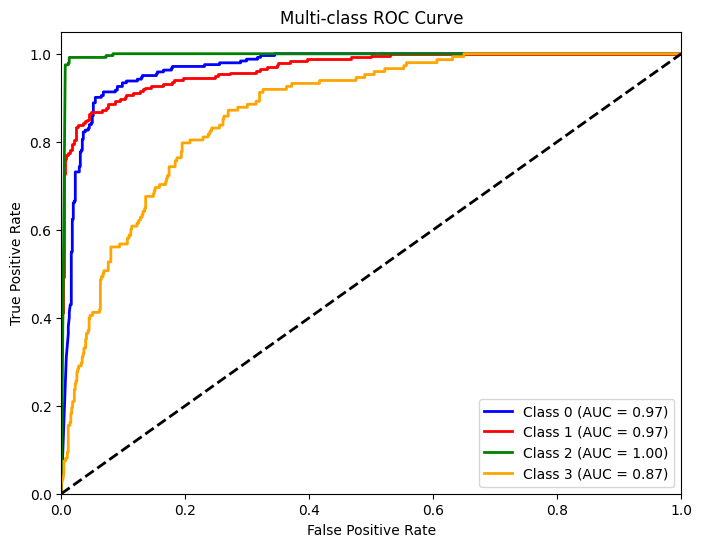


⚠️ Could not plot training history - 'history' object not found
You need to either:
1. Retrain the model and keep the history object
2. Load a previously saved history object
The ROC curve was still generated successfully.


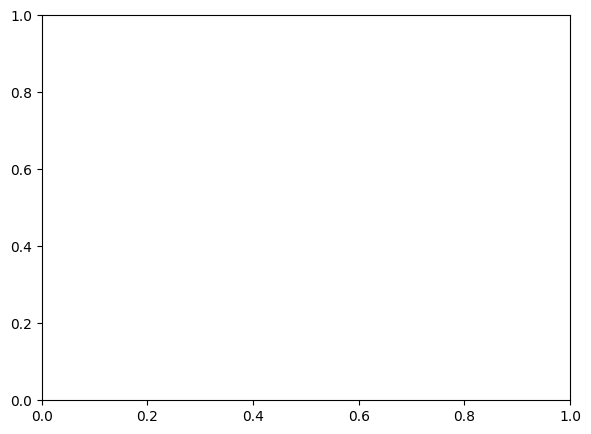

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# 1. First ensure you have your model and data ready
# (This should be from your existing training code)
model = tf.keras.models.load_model("/content/drive/My Drive/MedXNet_Project/medxnet_model.h5")

# 2. Prepare test data using existing dual_input_generator
def dual_input_generator(directory_iterator):
    for images, labels in directory_iterator:
        if images.ndim == 3:
            images = tf.expand_dims(images, axis=0)
            labels = tf.expand_dims(labels, axis=0)
        yield (images, images), labels

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    "/content/drive/My Drive/MedXNet_Project/chest_xray/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="sparse",
    shuffle=False
)

test_dual_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(test_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.float32)
    )
)

# 3. Get predictions for ROC curve
y_pred_probs = model.predict(test_dual_dataset, steps=len(test_generator))
y_true = test_generator.classes

# 4. ROC Curve
y_test_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Training History Graphs (only if you have the history object)
# If you don't have the history object, you'll need to retrain the model
try:
    # Loss graph
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    # Accuracy graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Combined Training Graph
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Metrics History')
    plt.ylabel('Value')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

except NameError:
    print("\n⚠️ Could not plot training history - 'history' object not found")
    print("You need to either:")
    print("1. Retrain the model and keep the history object")
    print("2. Load a previously saved history object")
    print("The ROC curve was still generated successfully.")